In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt


sys.path.append(r'G:\My Drive\Berkeley_NEW\MELTS_python_Paula\melts_matlab_git_master\package')
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

In [4]:
#!pip install --upgrade "https://github.com/gleesonm1/pyMELTScalc/archive/refs/tags/v0.0.11.zip"
import pyMELTScalc as M
M.__version__

'0.0.11'

In [5]:
Exp = pd.read_excel('Nandedkar2014.xlsx')
Elements = ['SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq', 'MnO_Liq', 'MgO_Liq',
            'CaO_Liq', 'Na2O_Liq', 'K2O_Liq', 'P2O5_Liq']

In [6]:
bulk = {'SiO2_Liq': Exp['SiO2_Liq'].loc[1], 
        'TiO2_Liq': Exp['TiO2_Liq'].loc[1], 
        'Al2O3_Liq': Exp['Al2O3_Liq'].loc[1], 
        'FeOt_Liq': Exp['FeOt_Liq'].loc[1], 
        'MnO_Liq': Exp['MnO_Liq'].loc[1], 
        'MgO_Liq': Exp['MgO_Liq'].loc[1], 
        'CaO_Liq': Exp['CaO_Liq'].loc[1], 
        'Na2O_Liq': Exp['Na2O_Liq'].loc[1], 
        'K2O_Liq': Exp['K2O_Liq'].loc[1],
        'P2O5_Liq': Exp['P2O5_Liq'].loc[1], 
        'H2O_Liq': 0.05, 
        'CO2_Liq': 0.0,
       'Fe3Fet_Liq': 0.17}

#49.39	1.53	14.08	0.06	10.25	0.18	10.32	12.05	1.95	0.21	0.17


In [7]:
Exp[Elements] = 100*Exp[Elements].values/np.nansum(Exp[Elements], axis = 1).reshape(17,1)

In [8]:
# P = 7000
# H2O_Liq = np.array([2, 3, 4])
# Results_102 = M.multi_path(Model = "MELTSv1.0.2", comp = bulk,
#                        T_end_C = 850, dt_C = 2, 
#                        P_bar = P, find_liquidus = True,
#                        H2O_Liq = H2O_Liq,
#                        Frac_solid = True, Frac_fluid = True,
#                       fO2_buffer = "NNO", fO2_offset = 0.0)

# Results_Pconst = M.multi_path(Model = "MELTSv1.2.0", comp = bulk,
#                        T_end_C = 850, dt_C = 2, 
#                        P_bar = P, find_liquidus = True,
#                        H2O_Liq = H2O_Liq,
#                        Frac_solid = True, Frac_fluid = True,
#                       fO2_buffer = "NNO", fO2_offset = 0.0)


# Results_H2Oconst = M.multi_path(Model = "MELTSv1.2.0", comp = bulk,
#                        T_end_C = 850, dt_C = 2, 
#                        P_bar = np.array([4000,7000,10000]), find_liquidus = True,
#                        H2O_Liq = 3,
#                        Frac_solid = True, Frac_fluid = True,
#                       fO2_buffer = "NNO", fO2_offset = 0.0)



  0%|          | 0/1 [00:00<?, ?it/s]

Running MELTSv1.0.2 calculations 0 to 2.0 ... Complete (time taken = 46.59 seconds)


  0%|          | 0/1 [00:00<?, ?it/s]

Running MELTSv1.2.0 calculations 0 to 2.0 ... Complete (time taken = 49.27 seconds)


  0%|          | 0/1 [00:00<?, ?it/s]

Running MELTSv1.2.0 calculations 0 to 2.0 ... Complete (time taken = 50.66 seconds)


In [22]:


# import pickle
# with open('Results_102.pck', 'wb') as file_handle:
#     pickle.dump(Results_102, file_handle)
# with open('Results_Pconst.pck', 'wb') as file_handle:
#     pickle.dump(Results_Pconst, file_handle)
# with open('Results_H2Oconst.pck', 'wb') as file_handle:
#     pickle.dump(Results_H2Oconst, file_handle)
    


In [23]:
with open('Results_102.pck', 'rb') as file_handle:
    Results_loaded_102 = pickle.load(file_handle)
with open('Results_Pconst.pck', 'rb') as file_handle:
    Results_loaded_Pconst = pickle.load(file_handle)
    
with open('Results_H2Oconst.pck', 'rb') as file_handle:
    Results_loaded_H2Oconst = pickle.load(file_handle)

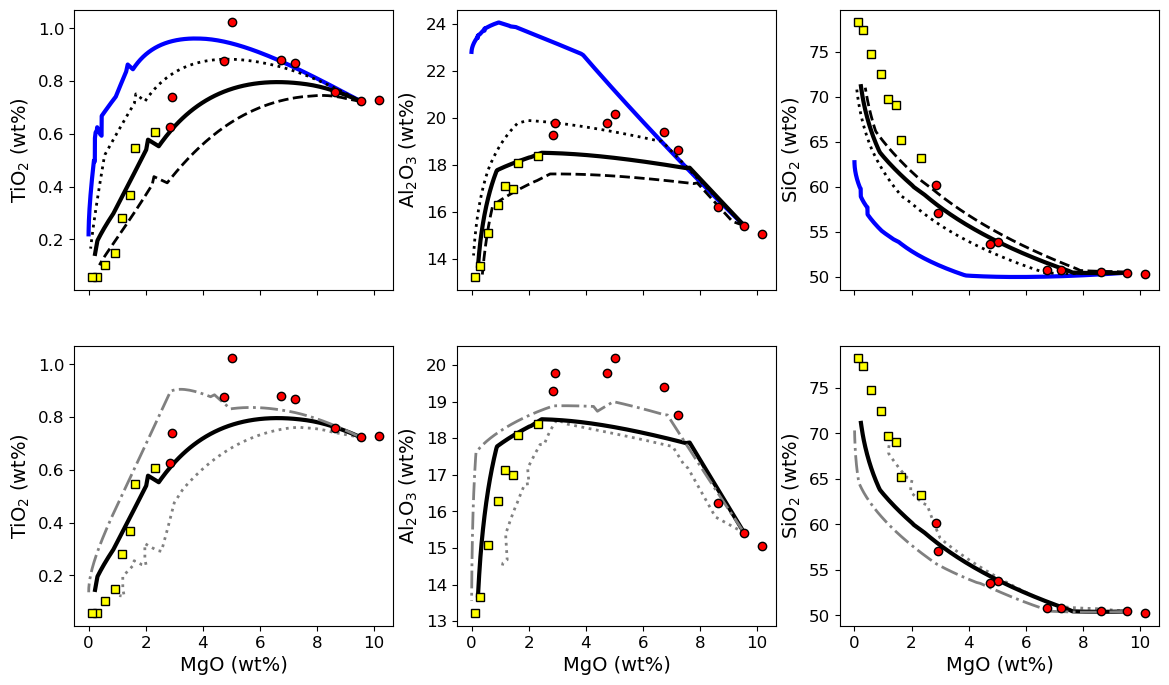

In [35]:
f, a = plt.subplots(2,3, figsize = (14,8), sharex = True)

y = ['TiO2_Liq', 'Al2O3_Liq', 'SiO2_Liq']

for index in Results_102:
    Results_102[index]['All'][Elements] = 100*Results_102[index]['All'][Elements].values/np.nansum(Results_102[index]['All'][Elements], axis = 1).reshape(len(Results_102[index]['All']['SiO2_Liq']),1)
    Results_Pconst[index]['All'][Elements] = 100*Results_Pconst[index]['All'][Elements].values/np.nansum(Results_Pconst[index]['All'][Elements], axis = 1).reshape(len(Results_Pconst[index]['All']['SiO2_Liq']),1)
    Results_H2Oconst[index]['All'][Elements] = 100*Results_H2Oconst[index]['All'][Elements].values/np.nansum(Results_H2Oconst[index]['All'][Elements], axis = 1).reshape(len(Results_H2Oconst[index]['All']['SiO2_Liq']),1)

for i in range(3):
    a[0][i].plot(Results_102['index = 0']['All']['MgO_Liq'],
             Results_102['index = 0']['All'][y[i]], '-', linewidth = 3, color = 'b')    
    a[0][i].plot(Results_Pconst['index = 0']['All']['MgO_Liq'],
             Results_Pconst['index = 0']['All'][y[i]], ':', linewidth = 2, color = 'k') 
    a[0][i].plot(Results_Pconst['index = 1']['All']['MgO_Liq'],
             Results_Pconst['index = 1']['All'][y[i]], '-', linewidth = 3, color = 'k') 
    a[0][i].plot(Results_Pconst['index = 2']['All']['MgO_Liq'],
             Results_Pconst['index = 2']['All'][y[i]], '--', linewidth = 2, color = 'k')
    a[0][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] > 2.65], Exp[y[i]][Exp['MgO_Liq'] > 2.65], 'ok',
                markerfacecolor = 'red', label = 'No Amp')
    a[0][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] <= 2.65], Exp[y[i]][Exp['MgO_Liq'] <= 2.65], 'sk',
                markerfacecolor = 'yellow', label = 'Amp present')
    a[0][i].set_ylabel(y[i][:-4] + ' (wt%)')
        
    a[1][i].plot(Results_H2Oconst['index = 0']['All']['MgO_Liq'],
             Results_H2Oconst['index = 0']['All'][y[i]], ':', linewidth = 2, color = 'grey') 
    a[1][i].plot(Results_H2Oconst['index = 1']['All']['MgO_Liq'],
             Results_H2Oconst['index = 1']['All'][y[i]], '-', linewidth = 3, color = 'k') 
    a[1][i].plot(Results_H2Oconst['index = 2']['All']['MgO_Liq'],
             Results_H2Oconst['index = 2']['All'][y[i]], '-.', linewidth = 2, color = 'grey')
    a[1][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] > 2.65], Exp[y[i]][Exp['MgO_Liq'] > 2.65], 'ok',
                markerfacecolor = 'red')
    a[1][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] <= 2.65], Exp[y[i]][Exp['MgO_Liq'] <= 2.65], 'sk',
                markerfacecolor = 'yellow')
    #a[1][i].set_ylabel(y[i][:-4] + ' (wt%)')
    
    a[1][i].set_xlabel('MgO (wt%)')
a[1][0].set_ylabel('TiO$_2$ (wt%)')
a[0][0].set_ylabel('TiO$_2$ (wt%)')
a[1][1].set_ylabel('Al$_2$O$_3$ (wt%)')
a[0][1].set_ylabel('Al$_2$O$_3$ (wt%)')
a[1][2].set_ylabel('SiO$_2$ (wt%)')
a[0][2].set_ylabel('SiO$_2$ (wt%)')

plt.savefig("Nandedkar.eps", dpi = 300, bbox_inches='tight')  